# 2D Plotting Functionalities for POSYDON PSyGrids

This tutorial shows you how to plot single and binary stellar tracks using the `plot2D` visualization library. The `plot2D` method supports either a MESA grid which samples the 2D parameter space of binary initial conditions in a 2D, 3D or 4D MESA space, e.g., star_1_mass, star_2_mass (or mass ratio), period_days, metallicity. In the 3D and 4D cases the MESA grid will be sliced along the dimensions specified by the user.

If you haven't done it already, export the environment variables.

In [1]:
%env PATH_TO_POSYDON=/Users/simone/Google Drive/github/POSYDON-public/
%env PATH_TO_POSYDON_DATA=/Volumes/T7/

env: PATH_TO_POSYDON=/Users/simone/Google Drive/github/POSYDON-public/
env: PATH_TO_POSYDON_DATA=/Volumes/T7/


Any plotting parameter is passed to the ``plot2D`` method through the kwarg ``PLOT_PROPERTIES``. Note that you can save each plot to a given ``path_to_file`` by specifying the filename ``fname`.

## Example: the HMS-HMS grid

Let's start by loading the grid.

In [2]:
import os
from posydon.config import PATH_TO_POSYDON_DATA
from posydon.grids.psygrid import PSyGrid

path_to_grid = os.path.join(PATH_TO_POSYDON_DATA, 'POSYDON_data/HMS-HMS/1e-01_Zsun.h5')
grid = PSyGrid(path_to_grid)
grid.load()

### MESA Termination Flags 1 and 2 combined

This plot summarizes the binary evolutionary simulation. 

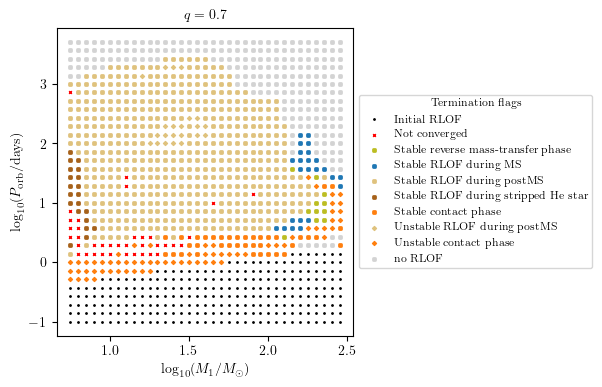

In [7]:
q = 0.7
PLOT_PROPERTIES = {
    'figsize': (4.5, 4.),
    'show_fig' : True,
    'close_fig' : True,
    #'path_to_file': './dirname/',
    #'fname': f'filename_q_{q}.png', # specify the filename if you want to save the figure
    'title' : r'$q = %1.1f$'%q,
    'log10_x' : True,
    'log10_y' : True,
}

grid.plot2D('star_1_mass', 'period_days', None,
            termination_flag='combined_TF12',
            grid_3D=True, slice_3D_var_str='mass_ratio',
            slice_3D_var_range=(q-0.025,q+0.025),
            verbose=False, **PLOT_PROPERTIES)

### MESA Termination Flag 1

This plot indicates why MESA stopped and allows to illustrata a final quantity.

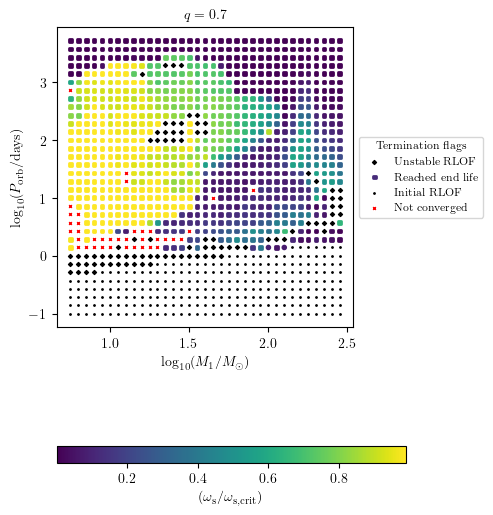

In [10]:
PLOT_PROPERTIES['figsize'] = (4.5,6.)
  
grid.plot2D('star_1_mass', 'period_days', 'S2_surf_avg_omega_div_omega_crit',
            termination_flag='termination_flag_1',
            grid_3D=True, slice_3D_var_str='mass_ratio',
            slice_3D_var_range=(q-0.025,q+0.025),
            verbose=False, **PLOT_PROPERTIES)

### MESA Termination Flag 2

The termination flag 2 shows a summary of all mass transfer cases which
occurred during the binaries' evolution.

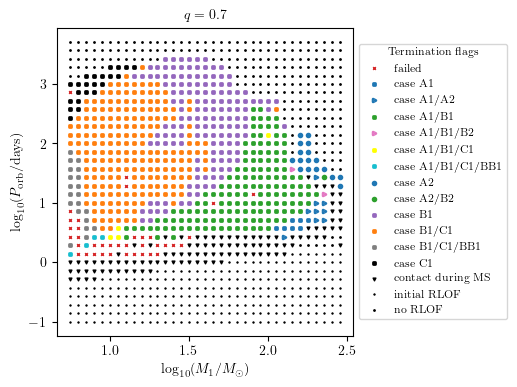

In [12]:
PLOT_PROPERTIES['figsize'] = (4.5,4.) # defualt

grid.plot2D('star_1_mass', 'period_days', None,
            termination_flag='termination_flag_2',
            grid_3D=True, slice_3D_var_str='mass_ratio',
            slice_3D_var_range=(q-0.025,q+0.025),
            verbose=False, **PLOT_PROPERTIES)

### MESA Termination Flag 3 and 4

The termination flag 3/ shows the final stellar state of star 1/2.

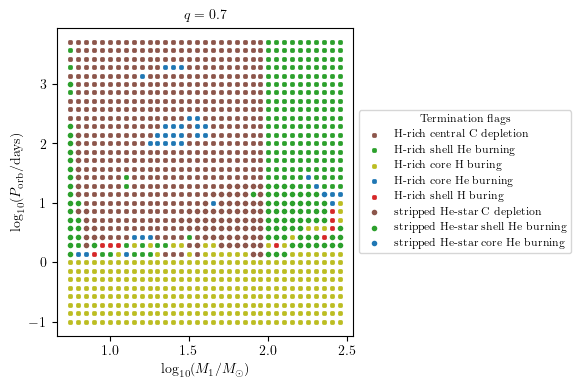

In [13]:
grid.plot2D('star_1_mass', 'period_days', None,
            termination_flag='termination_flag_3',
            grid_3D=True, slice_3D_var_str='mass_ratio',
            slice_3D_var_range=(q-0.025,q+0.025),
            verbose=False, **PLOT_PROPERTIES)

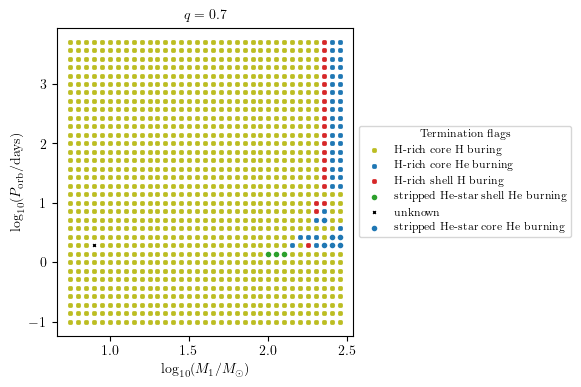

In [8]:
grid.plot2D('star_1_mass', 'period_days', None,
            termination_flag='termination_flag_4',
            grid_3D=True, slice_3D_var_str='mass_ratio',
            slice_3D_var_range=(q-0.025,q+0.025),
            verbose=False, **PLOT_PROPERTIES)

One can plot all termination flags at once in a large subplot of panels with
the option ``termination_flag='all'``.
In order to fit all legends we suggest to increase the figure size and marker
size to, e.g. ``(25,25)`` and ``30``, respectively.

### Display Relative Change of a Final Quantity

The relative change of any value stored within ``final_values`` can be
displayed by adding the prefix ``relative_change_`` to the z-variable displayed
as a colorbar. E.g. we can display the relative change of star_1_mass:

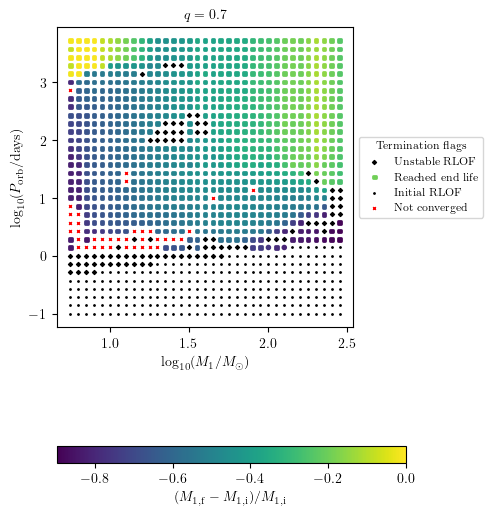

In [12]:
PLOT_PROPERTIES['figsize'] = (4.5,6.)
PLOT_PROPERTIES['colorbar'] = {'label' : r'$(M_\mathrm{1,f}-M_\mathrm{1,i})/M_\mathrm{1,i}$',}

grid.plot2D('star_1_mass', 'period_days', 'relative_change_star_1_mass',
            termination_flag='termination_flag_1',
            grid_3D=True, slice_3D_var_str='mass_ratio',
            slice_3D_var_range=(q-0.025,q+0.025),
            verbose=False, **PLOT_PROPERTIES)

### Display Custom Quantities

The user can plot custom quantities as a color map on termination flag 1.
For example, we display the maximum surf_avg_omega_div_omega_crit during
the history of star 2 as follows

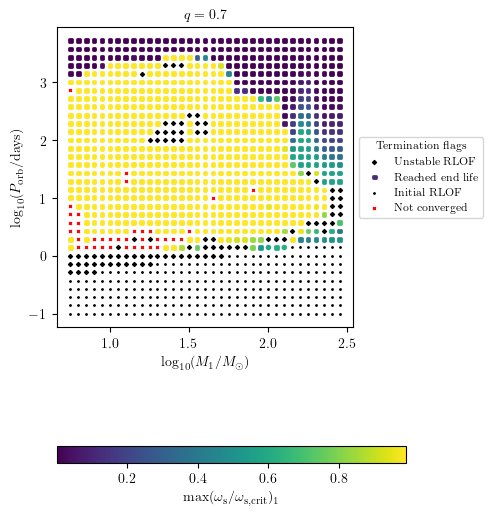

In [14]:
import numpy as np
PLOT_PROPERTIES['figsize'] = (4.5,6.)
PLOT_PROPERTIES['colorbar'] = {'label' : r'$\max(\omega_\mathrm{s}/\omega_\mathrm{s,crit})_1$'}

max_omega = [max(grid[i].history2['surf_avg_omega_div_omega_crit'])
            if grid[i].history2 is not None else np.nan
            for i in range(len(grid.MESA_dirs))]

grid.plot2D('star_1_mass', 'period_days', np.array(max_omega),
            termination_flag='termination_flag_1',
            grid_3D=True, slice_3D_var_str='mass_ratio',
            slice_3D_var_range=(q-0.025,q+0.025),
            verbose=False, **PLOT_PROPERTIES)

### Dispaly Core Collapse Quantities

Float quantities can be displayed using the z variable option as shown with termination flag 1.

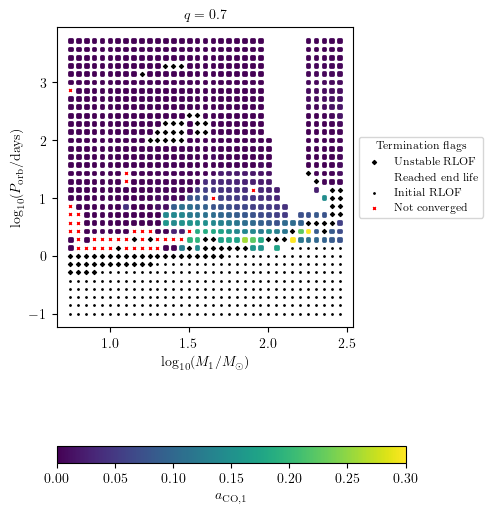

In [16]:
PLOT_PROPERTIES['figsize'] = (4.5,6.)
PLOT_PROPERTIES['colorbar'] = {'label' : r'$a_\mathrm{CO,1}$'}
PLOT_PROPERTIES['zmin'] = 0.
PLOT_PROPERTIES['zmax'] = 0.3

grid.plot2D('star_1_mass', 'period_days', 'S1_MODEL05_spin',
            termination_flag='termination_flag_1',
            grid_3D=True, slice_3D_var_str='mass_ratio',
            slice_3D_var_range=(q-0.025,q+0.025),
            verbose=False, **PLOT_PROPERTIES)

In [ ]:
The missig points in the above plots are NaN values associated to disruped stars due to pair instability supernovae (PISN). 

To display supernova type (SN_type) and compact object type (CO_type) are stored as strings in the dataset. These quantities can be plotted using the ``termination_flag`` option of ``plot2D``, as

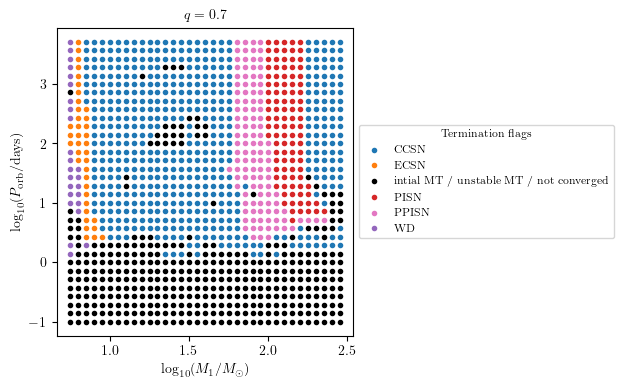

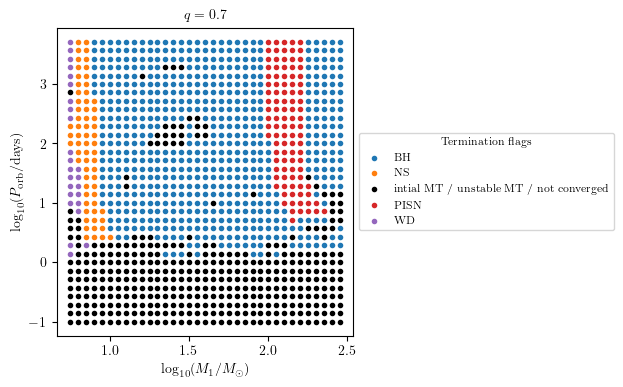

In [17]:
PLOT_PROPERTIES['figsize'] = (4.5,4.) # defualt

grid.plot2D('star_1_mass', 'period_days', None,
               termination_flag='S1_MODEL01_SN_type',
               grid_3D=True, slice_3D_var_str='mass_ratio',
               slice_3D_var_range=(q-0.025,q+0.025),
               verbose=False, **PLOT_PROPERTIES)

grid.plot2D('star_1_mass', 'period_days', None,
               termination_flag='S1_MODEL01_CO_type',
               grid_3D=True, slice_3D_var_str='mass_ratio',
               slice_3D_var_range=(q-0.025,q+0.025),
               verbose=False, **PLOT_PROPERTIES)


###  Displaying Final Quantities also for intial_MT, unstable_MT and not_converged Interpolationn Classes

We have a debug ``termination_flag`` option which allows us to display
as a colormap the final value also for the tracks that ends because of
initial or unstable mass transfer.

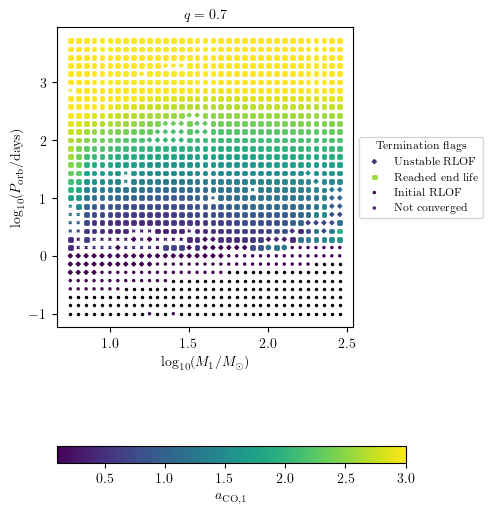

In [20]:
PLOT_PROPERTIES['figsize'] = (4.5,6.)
PLOT_PROPERTIES['log10_z'] = True
PLOT_PROPERTIES['zmin'] = 0.1
PLOT_PROPERTIES['zmax'] = 3

grid.plot2D('star_1_mass', 'period_days', 'period_days',
            termination_flag='debug',
            grid_3D=True, slice_3D_var_str='mass_ratio',
            slice_3D_var_range=(q-0.025,q+0.025),
            verbose=False, **PLOT_PROPERTIES)

## Advanced Plotting Functionalities

###  How to plot grid up to onset of RLO

This functionality allows to slice the MESA runs at onset of Roche-Lobe
overflow and display with a color a quantity in ``history1`` or
``binary_history``
at onset RLO, or, alternatively one of the termination flags. Use
``slice_at_RLO=True`` option of ``plot2D`` to allow for this.
Note: depending on how many
runs you intend to display this might take a while.

### Overplot grids on top of each others

Sometimes you want to rerun a subsample of the grid. This option will allow you
to stack as many grid reruns as you wish.
You can combine the new grid by passing it to the option ``extra_grid=new_grid``.
If you want to stack more than one grid, pass them in a list, e.g.
``extra_grid=[new_grid_1,new_grid_2,new_grid_3]``, they will be stacked in
the order provided where the last extra grid of the list will stacked as last.

### Creating plots with several slices

We have the option to pass a list of slice ranges. In this case the plotting
script will loop over those ranges and create one plot with several slice
plots. It will get a common legend and/or color bar.

There are two more options to the plot2D function:
1. ``max_cols``: It specifies the maximum number of columns of subplots. The
number of rows is automatically calculated to cover all plots and the legend.
2. ``legend_pos``: It specifies which subplots are used for the legend/color
bar and allows an index or tuple specifying a rectangle of indecies, like
matplotlib requires for creating a subplot.

Because the legend has its own axes, it is recommended to modify the default
``bbox_to_anchor`` of the legend.
To have a better control on the color bar, it got the additional field
``bounds`` in the plot properties.
To identify the subplots each of them will get a text box. Its attributes can
be modified by changing the field ``slice_text_kwargs`` in the plot properties.
The slices will loop over 3D and 4D idependently. If one of them has just a
single range, this slicing will be added to the legend title instead of being
reported in any subplot.

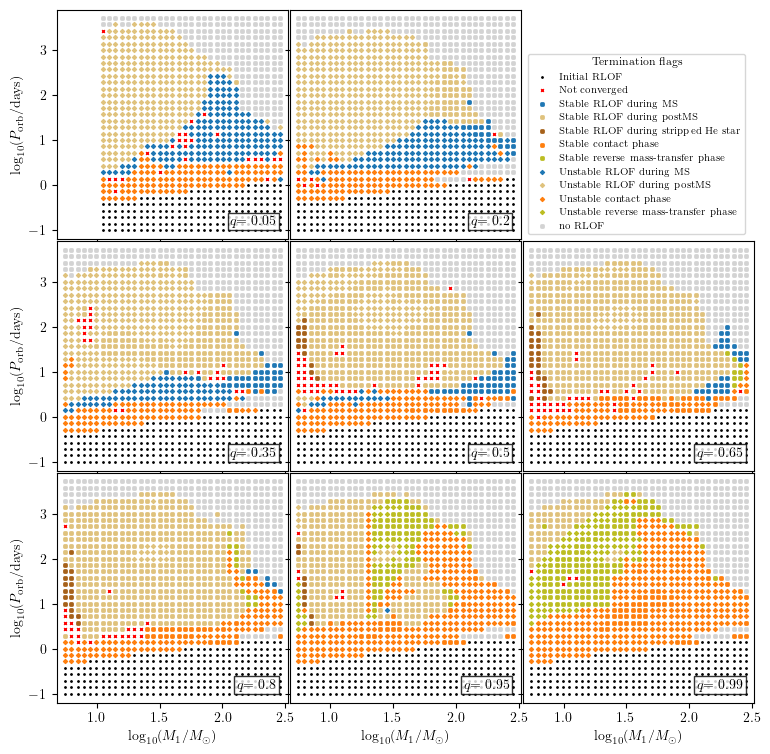

In [26]:
q_ranges = [(0.025, 0.075), (0.175, 0.225), (0.325, 0.375), (0.475, 0.525),
            (0.625, 0.675), (0.775, 0.825), (0.925, 0.975), (0.98, 1.0)]

plot_properties = {
    'show_fig': True,
    'figsize': (9, 9),
    'log10_x': True,
    'log10_y': True,
    'xmin': 0.68,
    'xmax': 2.52,
    'ymin': -1.2,
    'ymax': 3.9,
    'wspace': 0.01,
    'hspace': 0.01,
    'colorbar': {
        'bounds': [0.03, 0.7, 0.94, 0.05]
    },
    'legend2D': {
        'title': 'Termination flags',
        'loc': 'lower left',
        'prop': {
            'size': 7
        },
        'bbox_to_anchor': (0.0, 0.0),
    },
}
grid.plot2D('star_1_mass', 'period_days', None,
            termination_flag='combined_TF12',
            grid_3D=True, slice_3D_var_str='mass_ratio',
            slice_3D_var_range=q_ranges,
            legend_pos = (3,3),
            verbose=False, **plot_properties)

### Creating plots with several slices at different metallicities

TODO: add the plot

Congratulations! You are now a POSYDON PSyGrid visualization expert!